In [1]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix
import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')


In [2]:
#took this data from kaggle with more than 5lakh+ entries
phish_data = pd.read_csv('phishing_site_urls.csv')

In [3]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [4]:
# to check if there is missing values
phish_data.isnull().sum() 
#no missing values

URL      0
Label    0
dtype: int64

In [5]:
#created a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

<AxesSubplot:ylabel='Label'>

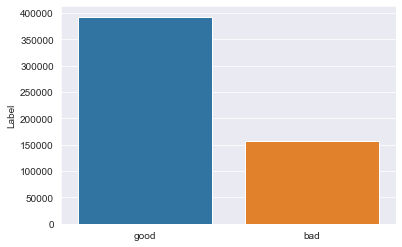

In [6]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

# Preprocessing

Now that we have the data, we will vectorize our URLs. I used CountVectorizer and gather words using tokenizer, since there are words in urls that are more important than other words e.g ‘virus’, ‘.exe’ ,’.dat’ etc. Lets convert the URLs into a vector form.


In [7]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+') #this will remove the numbers from url

In [8]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [9]:
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [10]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.793873165999912 sec


In [11]:
phish_data.sample(5)

,URL,Label,text_tokenized
424674,rootsweb.ancestry.com/~mojackso/elmwood.htm,good,"[rootsweb, ancestry, com, mojackso, elmwood, htm]"
414380,pitch.com/kansascity/bat-boy/Content?oid=2180017,good,"[pitch, com, kansascity, bat, boy, Content, oid]"
102804,footballnewsheadlines.co.uk/wp-admin/css/excel...,bad,"[footballnewsheadlines, co, uk, wp, admin, css..."
82746,mi.eng.cam.ac.uk/~gmt11/software/volmorph/volm...,good,"[mi, eng, cam, ac, uk, gmt, software, volmorph..."
51959,www.useit.com/alertbox/,good,"[www, useit, com, alertbox]"


In [12]:
#Snowball is a small string processing language, gives root words 
#Ex: Rock-rocks,sit-sits,talk-talks-talking,includes-includ
stemmer = SnowballStemmer("english") # choose a language

In [13]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 56.03399233400023 sec


In [14]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
314827,discerningtheworld.com/2009/05/09/the-died-aga...,good,"[discerningtheworld, com, the, died, again, ch...","[discerningtheworld, com, the, die, again, chr..."
243501,stockwellsassies.tripod.com/bio.html,good,"[stockwellsassies, tripod, com, bio, html]","[stockwellsassi, tripod, com, bio, html]"
238275,sertoma-gl-region.org/,good,"[sertoma, gl, region, org]","[sertoma, gl, region, org]"
407269,nudography.com/Celebrities/melissa_galianos.aspx,good,"[nudography, com, Celebrities, melissa, galian...","[nudographi, com, celebr, melissa, galiano, aspx]"
5051,us.battle.net.account.bettlenet.tk/login.asp?r...,bad,"[us, battle, net, account, bettlenet, tk, logi...","[us, battl, net, account, bettlenet, tk, login..."


In [15]:
#converting the tokenized array of words to string 
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.2564429160001964 sec


In [16]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
217747,music.yahoo.com/blogs/the-new-now/patrick-wats...,good,"[music, yahoo, com, blogs, the, new, now, patr...","[music, yahoo, com, blog, the, new, now, patri...",music yahoo com blog the new now patrick watso...
365563,jigsaw.com/scid19898484/ken_couche.xhtml,good,"[jigsaw, com, scid, ken, couche, xhtml]","[jigsaw, com, scid, ken, couch, xhtml]",jigsaw com scid ken couch xhtml
486772,mxp2103.com,bad,"[mxp, com]","[mxp, com]",mxp com
293063,blogto.com/events/47300,good,"[blogto, com, events]","[blogto, com, event]",blogto com event
51486,www.kwankin.com/index.html,good,"[www, kwankin, com, index, html]","[www, kwankin, com, index, html]",www kwankin com index html


Visualization
1. Visualize some important keys using word cloud

In [17]:
#slicing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [18]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [19]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
8,https://twitter.com/,good,"[https, twitter, com]","[https, twitter, com]",https twitter com
286,https://vtop.vit.ac.in/vtop/initialProcess,good,"[https, vtop, vit, ac, in, vtop, initialProcess]","[https, vtop, vit, ac, in, vtop, initialprocess]",https vtop vit ac in vtop initialprocess
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6(...,good,"[wwweira, nvinip, ncH, wV, yDaH, yE, u, rT, u,...","[wwweira, nvinip, nch, wv, ydah, ye, u, rt, u,...",wwweira nvinip nch wv ydah ye u rt u g m i xz ...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij!...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...


In [20]:

from nltk.corpus import stopwords 

def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    
    more_stopwords = {'com','http'}
    
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [21]:
#creating a function to visualize the important keys from url
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

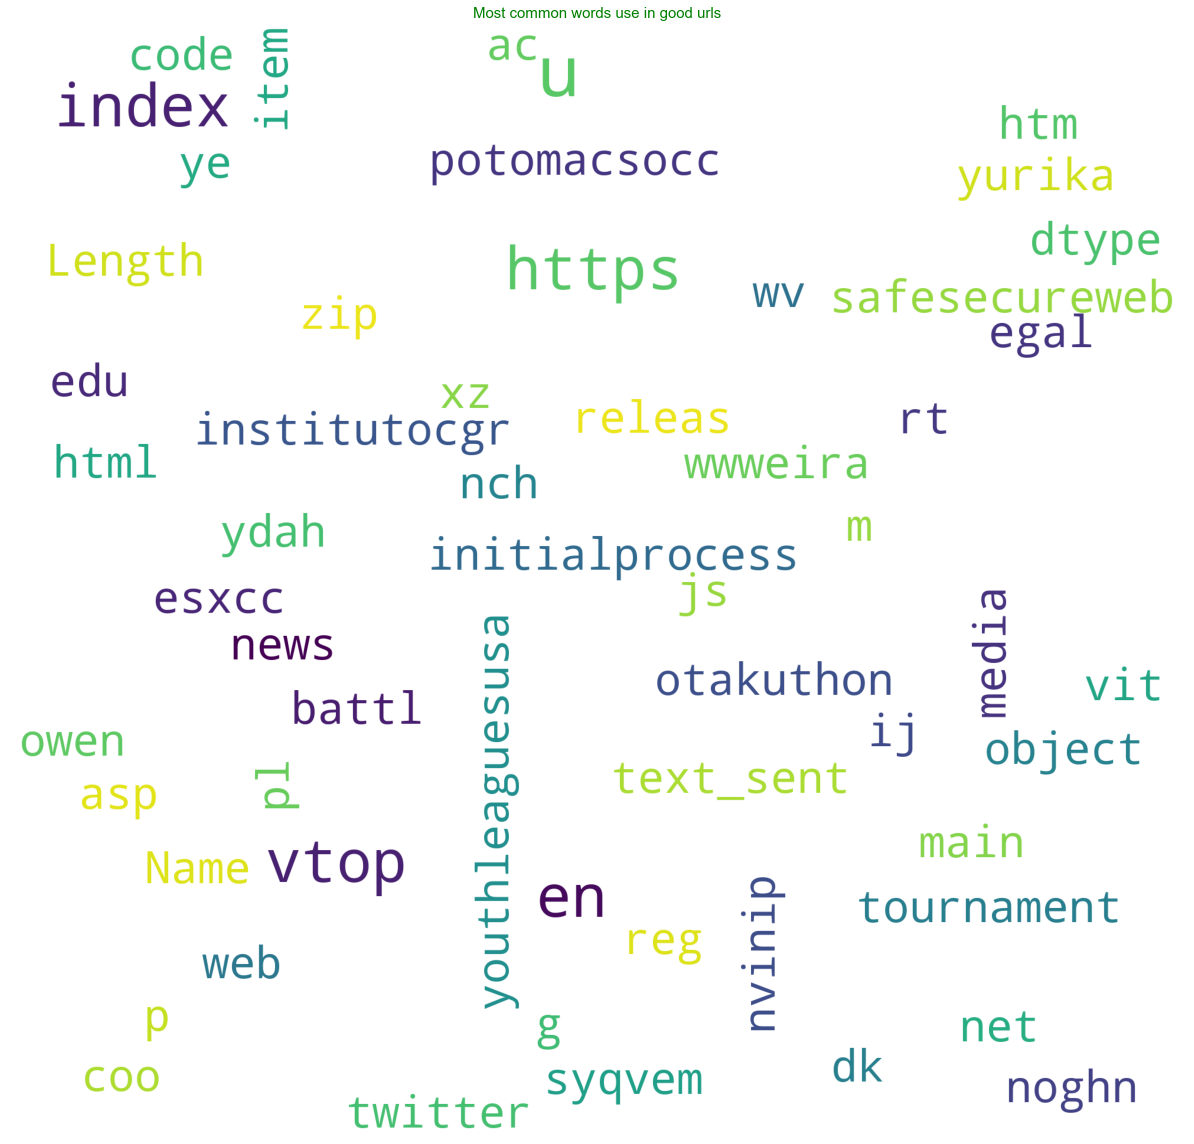

In [22]:
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

In [23]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

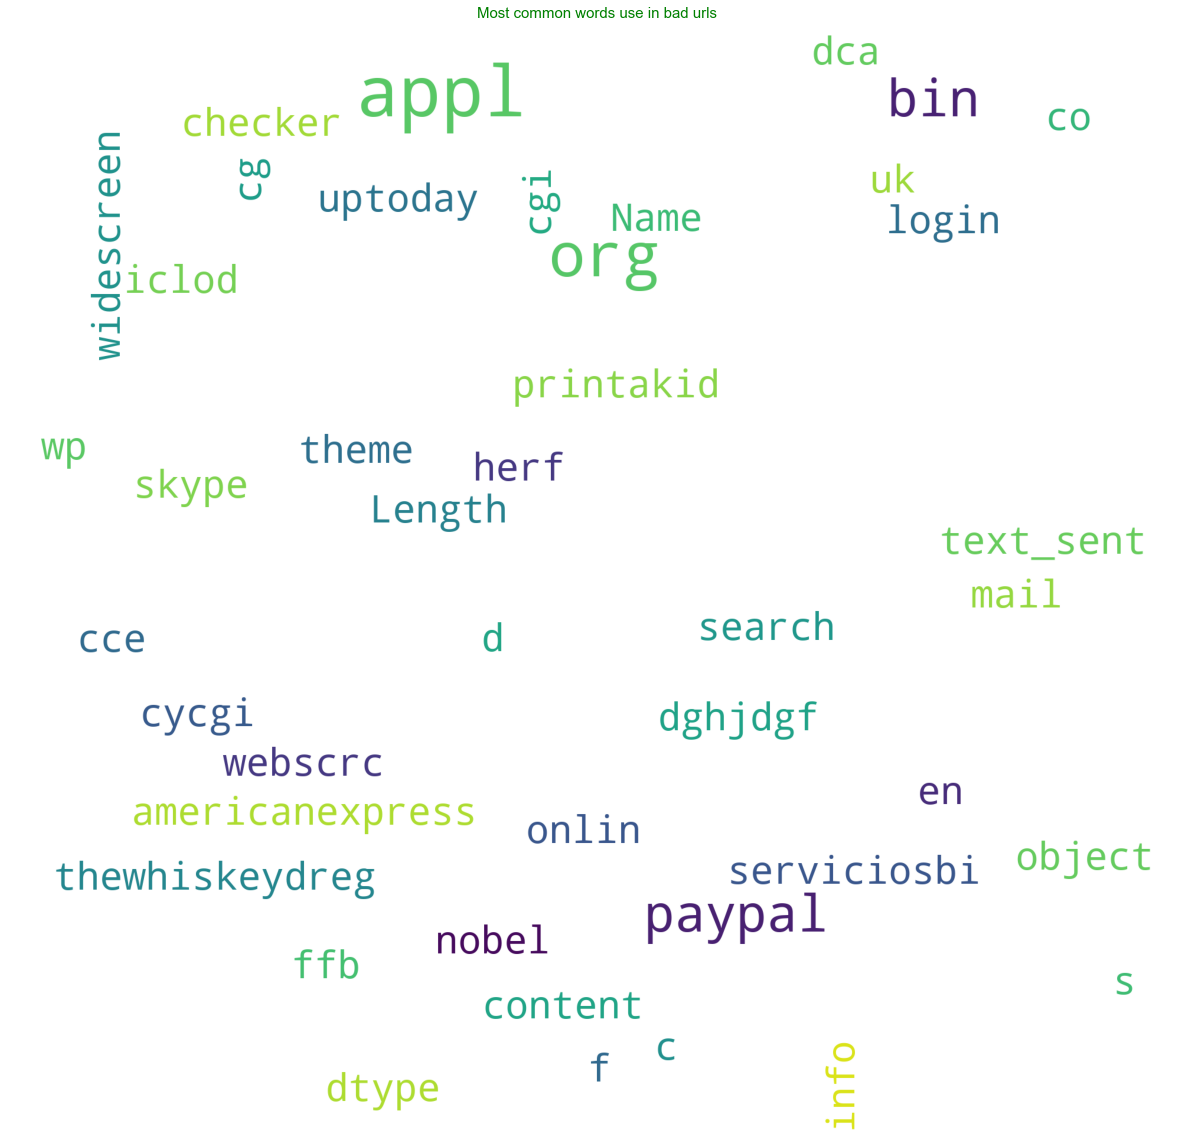

In [24]:
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

2. Visualize internal links, it will shows all redirect links.

Scrape any website
First, setting up the Chrome webdriver so we can scrape dynamic web pages.
Chrome webdriver
WebDriver tool use for automated testing of webapps across many browsers. It provides capabilities for navigating to web pages, user input and more

In [25]:
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
ser = Service("/usr/local/bin/chromedriver")
op = webdriver.ChromeOptions()
op.add_argument('--no-sandbox')
op.add_argument("--disable-setuid-sandbox")
browser= webdriver.Chrome(service=ser, options=op)


In [26]:
list_urls = ['https://ezee.com/','https://ezee.com/appliances/'] #here i took some sites 
links_with_text = []

In [27]:
from bs4 import BeautifulSoup
for url in list_urls:
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

I coverted URLs to dataframe


In [28]:
df = pd.DataFrame(links_with_text, columns=["from", "to"])

In [29]:
df.head()


,from,to
0,https://ezee.com/,https://ezee.com/products/
1,https://ezee.com/,https://ezee.com/appliances/
2,https://ezee.com/,https://ezee.com/vacuum-accessories/
3,https://ezee.com/,https://ezee.com/coffee-systems/
4,https://ezee.com/,https://ezee.com/dishwashers/


In [30]:
#Creating Model
#CountVectorizer
#CountVectorizer is used to transform a corpora of text to a vector of term / token counts.
#create cv object
cv = CountVectorizer()

In [31]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemmed

In [32]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
#* Spliting the data
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [34]:
#LogisticRegression


Logistic Regression is a Machine Learning classification algorithm used to assign observations to a discrete set of classes. Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud, Tumor Malignant or Benign. 
Logistic regression transforms its output using the logistic sigmoid function to return a probability value.


In [35]:
# create lr object
lr = LogisticRegression()

In [36]:
lr.fit(trainX,trainY)

LogisticRegression()

In [37]:
print('Accuracy is: ')
lr.score(testX,testY)

Accuracy is: 


0.9647655038336355

In [38]:
#MultinomialNB

# create mnb object
mnb = MultinomialNB()

In [39]:
mnb.fit(trainX,trainY) 

MultinomialNB()

In [40]:
print('Accuracy is: ')
mnb.score(testX,testY)

Accuracy is: 


0.9585909114077051

So, Logistic Regression is the best fit model, Now we make sklearn pipeline using Logistic Regression

In [41]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())


In [42]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [43]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [44]:
pipeline_ls.score(testX,testY) 

0.9677290169437224

In [45]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [46]:
loaded_model  = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9677290169437224


We get an accuracy of 97%. That’s a very high value for a machine to be able to detect a malicious URL with.
We can test some links to see if the model gives good predictions



* Bad links => this are phishing sites
yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php
fazan-pacir.rs/temp/libraries/ipad
www.tubemoviez.exe
svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt

* Good links => this are not phishing sites
www.youtube.com/
youtube.com/watch?v=qI0TQJI3vdU
www.retailhellunderground.com/
restorevisioncenters.com/html/technology.html

In [47]:
#Testing
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
